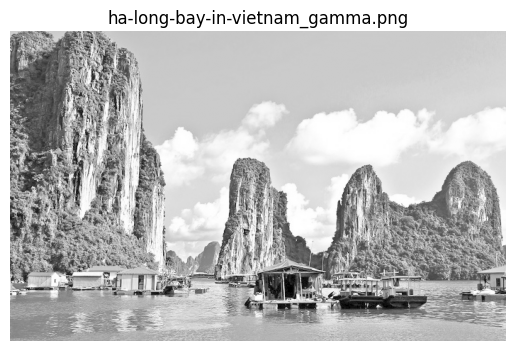

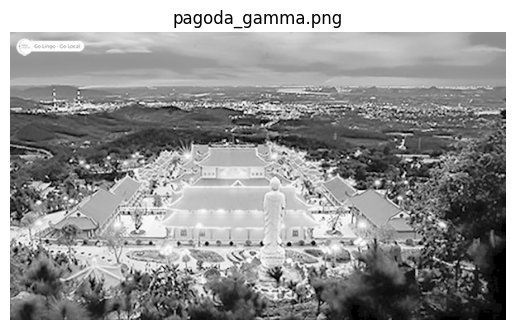

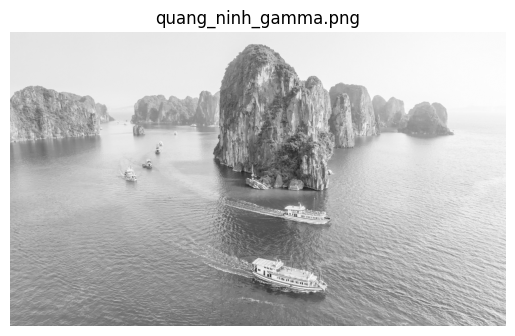

In [7]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

def inverse_transform(img):
    return 255 - img

def gamma_correction(img, gamma=0.5):
    img_float = img.astype(float)
    img_norm = img_float / 255.0
    corrected = np.power(img_norm, gamma)
    return np.uint8(corrected * 255)

def log_transform(img):
    img_float = img.astype(float)
    c = 255 / np.log(1 + np.max(img_float))
    log_img = c * np.log(1 + img_float)
    return np.uint8(log_img)

def histogram_equalization(img):
    return cv2.equalizeHist(img)

def contrast_stretching(img):
    a = np.min(img)
    b = np.max(img)
    stretched = 255 * (img - a) / (b - a)
    return np.uint8(stretched)

def show_and_save(img, filename):
    output_dir = 'output'
    os.makedirs(output_dir, exist_ok=True)
    filepath = os.path.join(output_dir, filename)
    cv2.imwrite(filepath, img)
    plt.imshow(img, cmap='gray')
    plt.title(filename)
    plt.axis('off')
    plt.show()

def main():
    folder = 'exercise'
    choice = input("Enter I, G, L, H, or C: ").upper()

    for fname in os.listdir(folder):
        if fname.endswith('.jpg') or fname.endswith('.png'):
            path = os.path.join(folder, fname)
            img = Image.open(path).convert('L')
            img_np = np.array(img)

            if choice == 'I':
                result = inverse_transform(img_np)
                suffix = '_inverse'
            elif choice == 'G':
                result = gamma_correction(img_np)
                suffix = '_gamma'
            elif choice == 'L':
                result = log_transform(img_np)
                suffix = '_log'
            elif choice == 'H':
                result = histogram_equalization(img_np)
                suffix = '_hist'
            elif choice == 'C':
                result = contrast_stretching(img_np)
                suffix = '_stretch'
            else:
                print("Invalid choice")
                return

            output_name = os.path.splitext(fname)[0] + suffix + '.png'
            show_and_save(result, output_name)

if __name__ == '__main__':
    main()


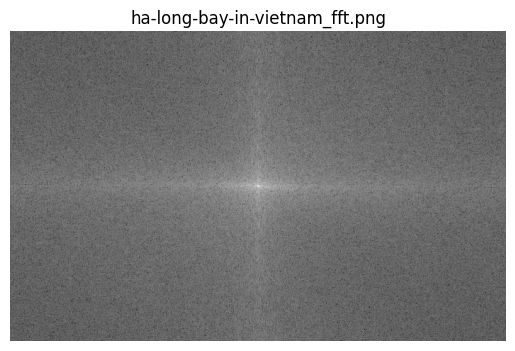

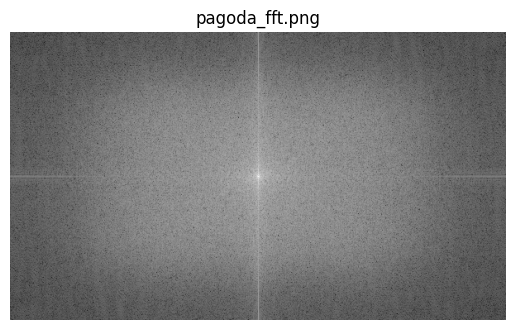

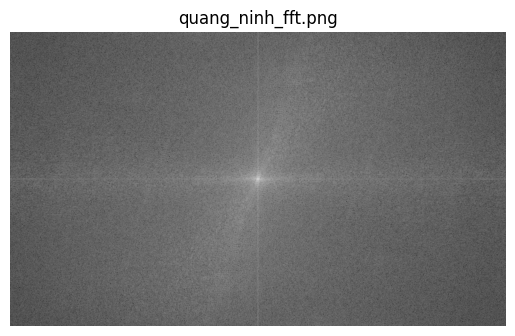

In [8]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy import fftpack
import math

def show_and_save(img, filename):
    output_dir = 'output'
    os.makedirs(output_dir, exist_ok=True)
    path = os.path.join(output_dir, filename)
    img_uint8 = np.uint8(img)
    Image.fromarray(img_uint8).save(path)
    plt.imshow(img, cmap='gray')
    plt.title(filename)
    plt.axis('off')
    plt.show()

def fast_fourier_transform(img):
    f = fftpack.fft2(img)
    fshift = fftpack.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift))
    return magnitude_spectrum

def butterworth_lowpass_filter(img, d0=30, n=1):
    M, N = img.shape
    u, v = np.meshgrid(np.arange(N), np.arange(M))
    center_u, center_v = N // 2, M // 2
    D = np.sqrt((u - center_u)**2 + (v - center_v)**2)
    H = 1 / (1 + (D / d0)**(2 * n))
    F = fftpack.fft2(img)
    F_shift = fftpack.fftshift(F)
    G = H * F_shift
    g = np.abs(fftpack.ifft2(fftpack.ifftshift(G)))
    return g

def butterworth_highpass_filter(img, d0=30, n=1):
    M, N = img.shape
    u, v = np.meshgrid(np.arange(N), np.arange(M))
    center_u, center_v = N // 2, M // 2
    D = np.sqrt((u - center_u)**2 + (v - center_v)**2)
    H = 1 / (1 + (d0 / (D + 1e-5))**(2 * n))
    F = fftpack.fft2(img)
    F_shift = fftpack.fftshift(F)
    G = H * F_shift
    g = np.abs(fftpack.ifft2(fftpack.ifftshift(G)))
    return g

def main():
    folder = 'exercise'
    choice = input("Enter F (Fourier), L (Lowpass), H (Highpass): ").upper()

    for fname in os.listdir(folder):
        if fname.endswith('.jpg') or fname.endswith('.png'):
            path = os.path.join(folder, fname)
            img = Image.open(path).convert('L')
            img_np = np.array(img)

            if choice == 'F':
                result = fast_fourier_transform(img_np)
                suffix = '_fft'
            elif choice == 'L':
                result = butterworth_lowpass_filter(img_np)
                suffix = '_lowpass'
            elif choice == 'H':
                result = butterworth_highpass_filter(img_np)
                suffix = '_highpass'
            else:
                print("Invalid choice")
                return

            output_name = os.path.splitext(fname)[0] + suffix + '.png'
            show_and_save(result, output_name)

if __name__ == '__main__':
    main()

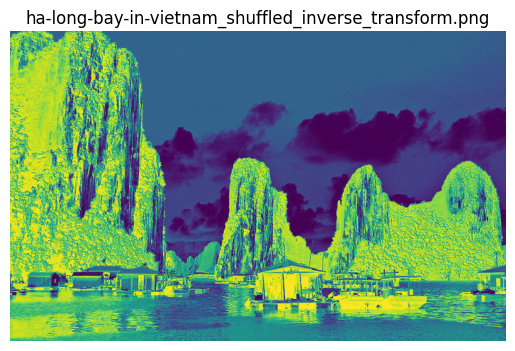

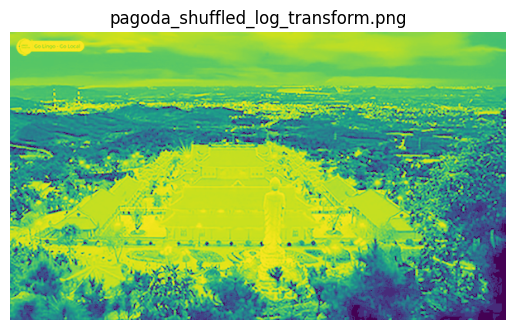

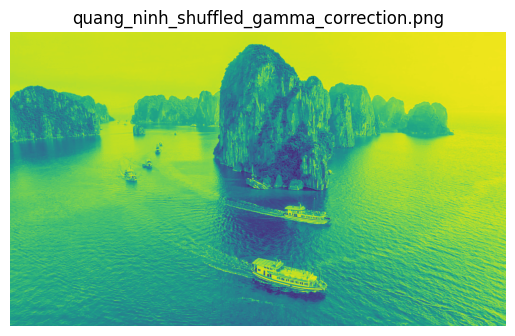

In [9]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import random

def inverse_transform(img):
    return 255 - img

def gamma_correction(img, gamma=0.5):
    img_float = img.astype(float)
    img_norm = img_float / 255.0
    corrected = np.power(img_norm, gamma)
    return np.uint8(corrected * 255)

def log_transform(img):
    img_float = img.astype(float)
    c = 255 / np.log(1 + np.max(img_float))
    log_img = c * np.log(1 + img_float)
    return np.uint8(log_img)

def histogram_equalization(img):
    return cv2.equalizeHist(img)

def contrast_stretching(img):
    a = np.min(img)
    b = np.max(img)
    stretched = 255 * (img - a) / (b - a)
    return np.uint8(stretched)

def show_and_save(img, filename):
    output_dir = 'output'
    os.makedirs(output_dir, exist_ok=True)
    path = os.path.join(output_dir, filename)
    Image.fromarray(img).save(path)
    plt.imshow(img)
    plt.title(filename)
    plt.axis('off')
    plt.show()

def apply_random_grayscale_transform(img):
    functions = [inverse_transform, gamma_correction, log_transform, histogram_equalization, contrast_stretching]
    chosen_func = random.choice(functions)
    return chosen_func(img), chosen_func.__name__

def main():
    folder = 'exercise'

    for fname in os.listdir(folder):
        if fname.endswith('.jpg') or fname.endswith('.png'):
            path = os.path.join(folder, fname)
            img = Image.open(path).convert('RGB')
            img_np = np.array(img)

            # Đảo thứ tự màu RGB
            channels = list(np.transpose(img_np, (2, 0, 1)))
            random.shuffle(channels)
            shuffled_img = np.transpose(np.stack(channels), (1, 2, 0))

            # Chuyển sang grayscale để xử lý
            gray_img = cv2.cvtColor(shuffled_img, cv2.COLOR_RGB2GRAY)

            # Áp dụng biến đổi ngẫu nhiên
            transformed_img, transform_name = apply_random_grayscale_transform(gray_img)

            output_name = os.path.splitext(fname)[0] + f'_shuffled_{transform_name}.png'
            show_and_save(transformed_img, output_name)

if __name__ == '__main__':
    main()


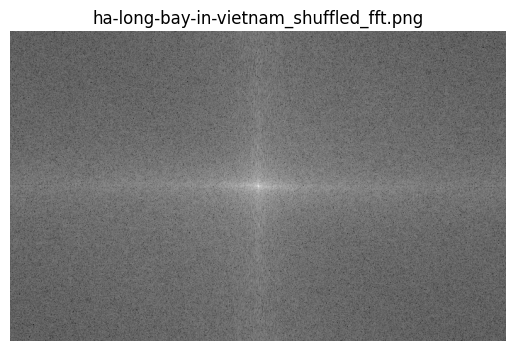

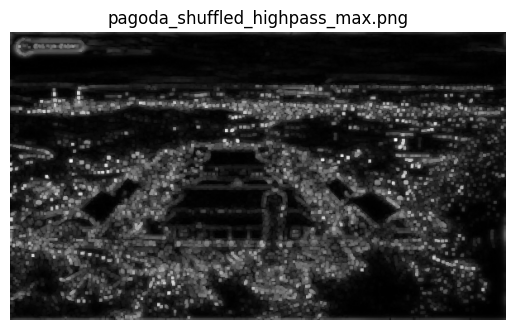

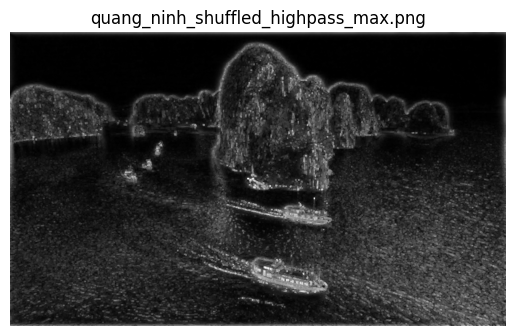

In [10]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy import fftpack, ndimage
import cv2
import random

def show_and_save(img, filename):
    output_dir = 'output'
    os.makedirs(output_dir, exist_ok=True)
    path = os.path.join(output_dir, filename)
    Image.fromarray(np.uint8(img)).save(path)
    plt.imshow(img, cmap='gray')
    plt.title(filename)
    plt.axis('off')
    plt.show()

def fft_transform(img):
    f = fftpack.fft2(img)
    fshift = fftpack.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)
    return magnitude_spectrum

def butterworth_lowpass(img, d0=30, n=1):
    M, N = img.shape
    u, v = np.meshgrid(np.arange(N), np.arange(M))
    center_u, center_v = N // 2, M // 2
    D = np.sqrt((u - center_u)**2 + (v - center_v)**2)
    H = 1 / (1 + (D / d0)**(2 * n))
    F = fftpack.fft2(img)
    F_shift = fftpack.fftshift(F)
    G = H * F_shift
    g = np.abs(fftpack.ifft2(fftpack.ifftshift(G)))
    return g

def butterworth_highpass(img, d0=30, n=1):
    M, N = img.shape
    u, v = np.meshgrid(np.arange(N), np.arange(M))
    center_u, center_v = N // 2, M // 2
    D = np.sqrt((u - center_u)**2 + (v - center_v)**2)
    H = 1 / (1 + (d0 / (D + 1e-5))**(2 * n))
    F = fftpack.fft2(img)
    F_shift = fftpack.fftshift(F)
    G = H * F_shift
    g = np.abs(fftpack.ifft2(fftpack.ifftshift(G)))
    return g

def apply_random_freq_filter(img):
    options = ["fft", "lowpass", "highpass"]
    chosen = random.choice(options)

    if chosen == "fft":
        transformed = fft_transform(img)
        return transformed, "fft"
    elif chosen == "lowpass":
        low = butterworth_lowpass(img)
        filtered = ndimage.minimum_filter(low, size=3)
        return filtered, "lowpass_min"
    elif chosen == "highpass":
        high = butterworth_highpass(img)
        filtered = ndimage.maximum_filter(high, size=3)
        return filtered, "highpass_max"


def main():
    folder = 'exercise'

    for fname in os.listdir(folder):
        if fname.endswith('.jpg') or fname.endswith('.png'):
            path = os.path.join(folder, fname)
            img = Image.open(path).convert('RGB')
            img_np = np.array(img)

            # Shuffle RGB channels
            channels = list(np.transpose(img_np, (2, 0, 1)))
            random.shuffle(channels)
            shuffled_img = np.transpose(np.stack(channels), (1, 2, 0))

            # Convert to grayscale
            gray = cv2.cvtColor(shuffled_img, cv2.COLOR_RGB2GRAY)

            # Apply random frequency-based filter
            result, tag = apply_random_freq_filter(gray)

            output_name = os.path.splitext(fname)[0] + f'_shuffled_{tag}.png'
            show_and_save(result, output_name)

if __name__ == '__main__':
    main()